<a href="https://colab.research.google.com/github/AlexBB999/Bridges/blob/master/Bridges_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT EVERYTHING I MAY USE**

In [0]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro
import statistics
from scipy.stats import normaltest
from scipy.stats import anderson
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [0]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#**The current system for inspecting bridges is expensive, time-consuming and inefficient**

The FHWA requires evaluation of all bridges however; it is costly having a
bi­annual inspection cost of $2.7 billion for the U.S

where  the  average inspection costper bridge ranges from $4,500 to $10,000.  This requires closing lanes for the span of theinspection, which can take 1 to 3 days causing traffic congestions.

**https://catsr.vse.gmu.edu/SYST490/490_2014_BI/BIS_FinalReport.pdf**

**My objective in this project is adding granualrity/priortization to the process to help address at least part of the aforementioned shortcomings.** 

The current system assigns a score called the "Structural Evaluation" to each brdge. It is a 10 point scale. A score of 4 or less marks the bridge as "Structurally Deficient" -- meaning the bridge needs repairs -- possibly replacement. It now has a priority when allocating limited funds for bridge maintenance. But the scoring of  0,1,2,3,4 is not as granular as need be. For example -- if two bridges have a score of 3 -- which one  do we repair first? If we allow decimals then we could have a score of 3.1 versus 3.5 so we know which is the first to get our limited funds.

#**STAKEHOLDERS**

The stakeholders have been clearly defined in the above quoted article:

The primary stakeholders of the bridge inspection systems are the Federal
Highway Administration (FHWA), District Department of Transportation (DDOT),
Bridge Design Engineers, Bridge Construction Team, and the Inspection Team which are directly involved with the construction and inspection of the bridge. The secondary stakeholders are groups of people that are not directly involved with the construction andinspection but are impacted indirectly such as the traveling public or the Bridge Users.

**My immediate audience (cohorts+instructor+you) are secondary stakeholders. But clearly this is of value to primary stakeholders**.


#**EXPLANATION FOR COULMNS DROPPED BEFORE ANY ANALYSIS**

I am not creating a dashboard so any columns having to do with location/identification are **not** relevent at this time. Thus, I have dropped the following columns:

State_code

Record_type

Route_prefix

Route_number

Direction

Highway District

County_code

Place_code

Features_Desc

Location

Kilopoint

Base_Hwy_network

LRS_Inv_Route

Subroute

Latitude

Longitude

Detour Kilos

Cat 10

Cat 23

Without goiing into the same level of deatil , I have dropped all columns having to do with water/navigation and other irrelevant columns like Right_curb and Left_curb. I am not stating that this information is not useful -- I am simply simplifying this project. To factor in all 136 features and many subfeatures is not a project -- it's a full-time job.

In [0]:
bridges9 = pd.read_csv('/content/drive/My Drive/2017HwyBridgesDelimitedAllStates.txt', sep=',',encoding='ISO-8859-1',low_memory=False)

**IDENTIFYING FEATURES BY COLUMN NUMBER**

In [0]:
g=list(range(1,138))

In [0]:
z=zip(g,list(bridges9))

In [7]:
list(z)

[(1, 'STATE_CODE_001'),
 (2, 'STRUCTURE_NUMBER_008'),
 (3, 'RECORD_TYPE_005A'),
 (4, 'ROUTE_PREFIX_005B'),
 (5, 'SERVICE_LEVEL_005C'),
 (6, 'ROUTE_NUMBER_005D'),
 (7, 'DIRECTION_005E'),
 (8, 'HIGHWAY_DISTRICT_002'),
 (9, 'COUNTY_CODE_003'),
 (10, 'PLACE_CODE_004'),
 (11, 'FEATURES_DESC_006A'),
 (12, 'CRITICAL_FACILITY_006B'),
 (13, 'FACILITY_CARRIED_007'),
 (14, 'LOCATION_009'),
 (15, 'MIN_VERT_CLR_010'),
 (16, 'KILOPOINT_011'),
 (17, 'BASE_HWY_NETWORK_012'),
 (18, 'LRS_INV_ROUTE_013A'),
 (19, 'SUBROUTE_NO_013B'),
 (20, 'LAT_016'),
 (21, 'LONG_017'),
 (22, 'DETOUR_KILOS_019'),
 (23, 'TOLL_020'),
 (24, 'MAINTENANCE_021'),
 (25, 'OWNER_022'),
 (26, 'FUNCTIONAL_CLASS_026'),
 (27, 'YEAR_BUILT_027'),
 (28, 'TRAFFIC_LANES_ON_028A'),
 (29, 'TRAFFIC_LANES_UND_028B'),
 (30, 'ADT_029'),
 (31, 'YEAR_ADT_030'),
 (32, 'DESIGN_LOAD_031'),
 (33, 'APPR_WIDTH_MT_032'),
 (34, 'MEDIAN_CODE_033'),
 (35, 'DEGREES_SKEW_034'),
 (36, 'STRUCTURE_FLARED_035'),
 (37, 'RAILINGS_036A'),
 (38, 'TRANSITIONS_036B'),


**I HAVE ALREADY DONE SOME FEATURE SELECTION, AS NOTED ABOVE,  SO I AM NOT USING ALL 136 FEATURES**

In [0]:
bridges99=bridges9.iloc[:,[4,22,23,26,27,31,45,47,54,59,66,67,68,72,74,75,76,106,107,108,109,132]]

In [40]:
bridges99.head()

,SERVICE_LEVEL_005C,TOLL_020,MAINTENANCE_021,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,DESIGN_LOAD_031,SERVICE_ON_042A,STRUCTURE_KIND_043A,MAX_SPAN_LEN_MT_048,DECK_WIDTH_MT_052,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,OPERATING_RATING_064,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,SUFFICIENCY_RATING
0,1.0,3,62,1999,2.0,5,1,5,14.7,9.7,8,8,7,44.2,32.4,7,7,2,6,0,1,100.0
1,1.0,3,62,2002,2.0,5,1,5,12.9,9.8,8,8,7,84.2,34.6,7,6,2,6,0,8,100.0
2,1.0,3,74,1942,2.0,4,1,1,18.3,9.0,5,5,6,51.7,37.2,5,4,1,1,0,0,69.5
3,1.0,3,67,1974,2.0,5,1,5,14.0,10.5,7,7,7,44.2,26.6,6,6,1,1,0,0,90.2
4,1.0,3,67,1937,2.0,4,5,3,53.3,7.8,6,6,7,40.0,23.9,5,2,1,1,0,0,49.9


In [61]:
bridges99.shape


(615002, 23)

In [65]:
bridges99['YEAR_BUILT_027'].nunique()

118

In [0]:
bridges99=bridges99[bridges99['YEAR_BUILT_027']>1899]

In [0]:
bridges99['binned']=pd.cut(bridges99['YEAR_BUILT_027'],bins=[1889,1899,1909,1919,1929,1939,1949,1959,1969,1979,1989,1999,2009,2019], labels=False)

In [63]:
bridges99.shape

(613231, 23)

In [67]:
bridges99.head()

,SERVICE_LEVEL_005C,TOLL_020,MAINTENANCE_021,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,DESIGN_LOAD_031,SERVICE_ON_042A,STRUCTURE_KIND_043A,MAX_SPAN_LEN_MT_048,DECK_WIDTH_MT_052,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,OPERATING_RATING_064,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,SUFFICIENCY_RATING,binned
0,1.0,3,62,1999,2.0,5,1,5,14.7,9.7,8,8,7,44.2,32.4,7,7,2,6,0,1,100.0,10
1,1.0,3,62,2002,2.0,5,1,5,12.9,9.8,8,8,7,84.2,34.6,7,6,2,6,0,8,100.0,11
2,1.0,3,74,1942,2.0,4,1,1,18.3,9.0,5,5,6,51.7,37.2,5,4,1,1,0,0,69.5,5
3,1.0,3,67,1974,2.0,5,1,5,14.0,10.5,7,7,7,44.2,26.6,6,6,1,1,0,0,90.2,8
4,1.0,3,67,1937,2.0,4,5,3,53.3,7.8,6,6,7,40.0,23.9,5,2,1,1,0,0,49.9,4


**GET AN OVERVIEW OF OUR DATA**

In [68]:
bridges99.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613231 entries, 0 to 615001
Data columns (total 23 columns):
SERVICE_LEVEL_005C         613228 non-null float64
TOLL_020                   613231 non-null int64
MAINTENANCE_021            613231 non-null int64
YEAR_BUILT_027             613231 non-null int64
TRAFFIC_LANES_ON_028A      613227 non-null float64
DESIGN_LOAD_031            613231 non-null object
SERVICE_ON_042A            613231 non-null int64
STRUCTURE_KIND_043A        613231 non-null int64
MAX_SPAN_LEN_MT_048        613231 non-null float64
DECK_WIDTH_MT_052          613227 non-null float64
DECK_COND_058              613231 non-null object
SUPERSTRUCTURE_COND_059    613231 non-null object
SUBSTRUCTURE_COND_060      613231 non-null object
OPERATING_RATING_064       609286 non-null float64
INVENTORY_RATING_066       609322 non-null float64
STRUCTURAL_EVAL_067        613231 non-null object
DECK_GEOMETRY_EVAL_068     613231 non-null object
DECK_STRUCTURE_TYPE_107    613231 non-

**CHECK FOR NAN**

In [69]:
bridges99.isna().sum()

SERVICE_LEVEL_005C            3
TOLL_020                      0
MAINTENANCE_021               0
YEAR_BUILT_027                0
TRAFFIC_LANES_ON_028A         4
DESIGN_LOAD_031               0
SERVICE_ON_042A               0
STRUCTURE_KIND_043A           0
MAX_SPAN_LEN_MT_048           0
DECK_WIDTH_MT_052             4
DECK_COND_058                 0
SUPERSTRUCTURE_COND_059       0
SUBSTRUCTURE_COND_060         0
OPERATING_RATING_064       3945
INVENTORY_RATING_066       3909
STRUCTURAL_EVAL_067           0
DECK_GEOMETRY_EVAL_068        0
DECK_STRUCTURE_TYPE_107       0
SURFACE_TYPE_108A             1
MEMBRANE_TYPE_108B            2
DECK_PROTECTION_108C          1
SUFFICIENCY_RATING            0
binned                        0
dtype: int64

**DROP NANs -- LESS THAN .6% OF DATA**

In [0]:
bridges99.dropna(how='any',inplace=True,axis=0)

In [71]:
bridges99.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609268 entries, 0 to 615001
Data columns (total 23 columns):
SERVICE_LEVEL_005C         609268 non-null float64
TOLL_020                   609268 non-null int64
MAINTENANCE_021            609268 non-null int64
YEAR_BUILT_027             609268 non-null int64
TRAFFIC_LANES_ON_028A      609268 non-null float64
DESIGN_LOAD_031            609268 non-null object
SERVICE_ON_042A            609268 non-null int64
STRUCTURE_KIND_043A        609268 non-null int64
MAX_SPAN_LEN_MT_048        609268 non-null float64
DECK_WIDTH_MT_052          609268 non-null float64
DECK_COND_058              609268 non-null object
SUPERSTRUCTURE_COND_059    609268 non-null object
SUBSTRUCTURE_COND_060      609268 non-null object
OPERATING_RATING_064       609268 non-null float64
INVENTORY_RATING_066       609268 non-null float64
STRUCTURAL_EVAL_067        609268 non-null object
DECK_GEOMETRY_EVAL_068     609268 non-null object
DECK_STRUCTURE_TYPE_107    609268 non-

In [72]:
bridges99['STRUCTURAL_EVAL_067'].value_counts(dropna=False)

7    176652
6    172155
5    105774
8     72211
4     44175
2     14959
3     10399
9      9815
0      3128
Name: STRUCTURAL_EVAL_067, dtype: int64

**THE TARGET IS STRUCTURAL_EVALUATION**

**THIS IS HOW NBI DETERMINES IF BRIDGE IS "STRUCTURALLY DEFICIENT"**

**CREATE NEW FEATURE - MAIN SPAN SURFACE AREA  =MAX_SPAN_LEN_MT_048 X DECK_WIDTH_MT_052**

**THE TOTAL SURFACE AREA OF THE MAIN SPAN HAS BEEN USED IN SOME STUDIES**

In [0]:
bridges99['surface_area']=bridges99['MAX_SPAN_LEN_MT_048']*bridges99['DECK_WIDTH_MT_052']

In [74]:
bridges99.head()

,SERVICE_LEVEL_005C,TOLL_020,MAINTENANCE_021,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,DESIGN_LOAD_031,SERVICE_ON_042A,STRUCTURE_KIND_043A,MAX_SPAN_LEN_MT_048,DECK_WIDTH_MT_052,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,OPERATING_RATING_064,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,SUFFICIENCY_RATING,binned,surface_area
0,1.0,3,62,1999,2.0,5,1,5,14.7,9.7,8,8,7,44.2,32.4,7,7,2,6,0,1,100.0,10,142.59
1,1.0,3,62,2002,2.0,5,1,5,12.9,9.8,8,8,7,84.2,34.6,7,6,2,6,0,8,100.0,11,126.42
2,1.0,3,74,1942,2.0,4,1,1,18.3,9.0,5,5,6,51.7,37.2,5,4,1,1,0,0,69.5,5,164.70
3,1.0,3,67,1974,2.0,5,1,5,14.0,10.5,7,7,7,44.2,26.6,6,6,1,1,0,0,90.2,8,147.00
4,1.0,3,67,1937,2.0,4,5,3,53.3,7.8,6,6,7,40.0,23.9,5,2,1,1,0,0,49.9,4,415.74


In [75]:
bridges99['SURFACE_TYPE_108A'].value_counts()

6    180393
1    172669
N     96347
0     62675
8     26023
2     17351
7     14052
3     13350
9     10613
4      9246
5      6549
Name: SURFACE_TYPE_108A, dtype: int64

Type of Service On Bridge

Code            Description

1                  Highway

2                  Railroad

3                  Pedestrian-bicycle

4                  Highway-railroad

5                  Highway-pedestrian

6                  Overpass structure at an interchange or second level of a multilevel interchange

7                  Third level (Interchange)

8                  Fourth level (Interchange)

9                  Building of plaza


0                  Other

99                 Miscoded data

**KEEP ONLY BRIDGES THAT ARE HIGHWAY OR HIGHWAY-PEDESTRIAN (10,246 dropped)**

**Again, I have to limit this project so I am keeping the two designation that make up over 90% of the bridges**.

In [76]:
bridges9['SERVICE_ON_042A'].value_counts(dropna=False)

1    550652
5     53308
6     10074
7       575
4       223
8       170
Name: SERVICE_ON_042A, dtype: int64

In [0]:
bridges99=bridges99[(bridges99['SERVICE_ON_042A']==1) | (bridges99['SERVICE_ON_042A']==5) ]

In [78]:
bridges99['SERVICE_ON_042A'].value_counts()

1    545605
5     52638
Name: SERVICE_ON_042A, dtype: int64

In [79]:
bridges99.shape

(598243, 24)

**CONVERT STRUCTURAL_EVALUATION TO NUMERIC**

In [80]:
bridges99['STRUCTURAL_EVAL_067']=bridges99['STRUCTURAL_EVAL_067'].str.strip('()')
type(bridges99['STRUCTURAL_EVAL_067'][0])

str

In [0]:
bridges99['STRUCTURAL_EVAL_067']=bridges99['STRUCTURAL_EVAL_067'].astype(int)

In [82]:
bridges99.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598243 entries, 0 to 615001
Data columns (total 24 columns):
SERVICE_LEVEL_005C         598243 non-null float64
TOLL_020                   598243 non-null int64
MAINTENANCE_021            598243 non-null int64
YEAR_BUILT_027             598243 non-null int64
TRAFFIC_LANES_ON_028A      598243 non-null float64
DESIGN_LOAD_031            598243 non-null object
SERVICE_ON_042A            598243 non-null int64
STRUCTURE_KIND_043A        598243 non-null int64
MAX_SPAN_LEN_MT_048        598243 non-null float64
DECK_WIDTH_MT_052          598243 non-null float64
DECK_COND_058              598243 non-null object
SUPERSTRUCTURE_COND_059    598243 non-null object
SUBSTRUCTURE_COND_060      598243 non-null object
OPERATING_RATING_064       598243 non-null float64
INVENTORY_RATING_066       598243 non-null float64
STRUCTURAL_EVAL_067        598243 non-null int64
DECK_GEOMETRY_EVAL_068     598243 non-null object
DECK_STRUCTURE_TYPE_107    598243 non-n

**HISTOGRAMS OF NUMERICAL FEATURES**

**TO HELP WITH FEATURE ENGINEERING**

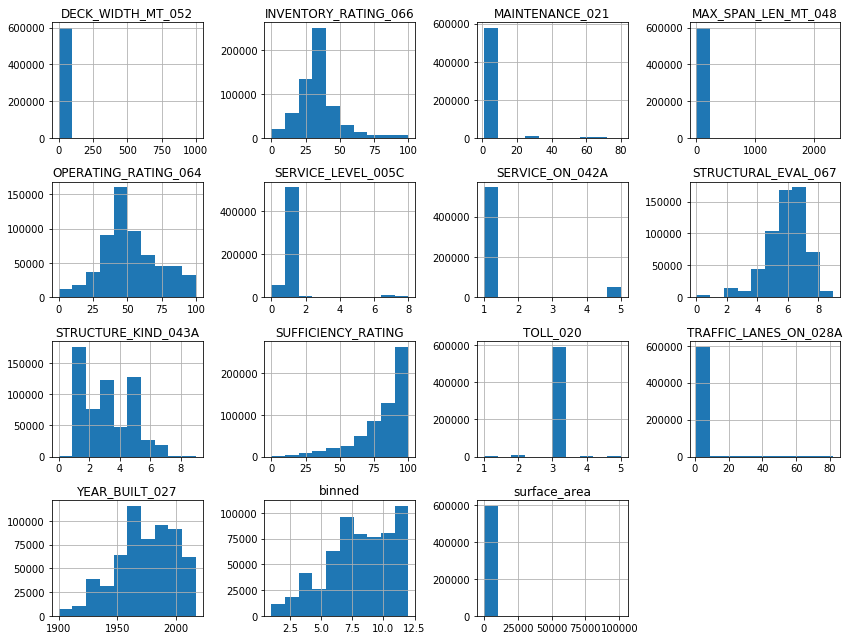

In [83]:
plt.rcParams["figure.figsize"] = [12,9]
bridges99.hist()
plt.tight_layout()

In [84]:
bridges99.head(2)

,SERVICE_LEVEL_005C,TOLL_020,MAINTENANCE_021,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,DESIGN_LOAD_031,SERVICE_ON_042A,STRUCTURE_KIND_043A,MAX_SPAN_LEN_MT_048,DECK_WIDTH_MT_052,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,OPERATING_RATING_064,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,SUFFICIENCY_RATING,binned,surface_area
0,1.0,3,62,1999,2.0,5,1,5,14.7,9.7,8,8,7,44.2,32.4,7,7,2,6,0,1,100.0,10,142.59
1,1.0,3,62,2002,2.0,5,1,5,12.9,9.8,8,8,7,84.2,34.6,7,6,2,6,0,8,100.0,11,126.42


**NOW THAT ALL TOLL VALUES ARE IDENTICAL  -- TOLL  CONTRIBUTES NOTHING TO MODEL SO DROP** 

In [0]:
bridges99.drop('TOLL_020',axis=1,inplace=True)

In [86]:
bridges99.head()

,SERVICE_LEVEL_005C,MAINTENANCE_021,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,DESIGN_LOAD_031,SERVICE_ON_042A,STRUCTURE_KIND_043A,MAX_SPAN_LEN_MT_048,DECK_WIDTH_MT_052,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,OPERATING_RATING_064,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,SUFFICIENCY_RATING,binned,surface_area
0,1.0,62,1999,2.0,5,1,5,14.7,9.7,8,8,7,44.2,32.4,7,7,2,6,0,1,100.0,10,142.59
1,1.0,62,2002,2.0,5,1,5,12.9,9.8,8,8,7,84.2,34.6,7,6,2,6,0,8,100.0,11,126.42
2,1.0,74,1942,2.0,4,1,1,18.3,9.0,5,5,6,51.7,37.2,5,4,1,1,0,0,69.5,5,164.70
3,1.0,67,1974,2.0,5,1,5,14.0,10.5,7,7,7,44.2,26.6,6,6,1,1,0,0,90.2,8,147.00
4,1.0,67,1937,2.0,4,5,3,53.3,7.8,6,6,7,40.0,23.9,5,2,1,1,0,0,49.9,4,415.74


**6.1 METERS IS FEDERAL MINIMUM TO BE A BRIDGE**

**REMOVE BRIDGES LESS THAN 6.1 METERS MAIN SPAN**  (152,926)

**About 25% of the listed bridges meet state definitions of a bridge. I am only looking at those that meet the federal definition**.

In [0]:
bridges99=bridges99[bridges99['MAX_SPAN_LEN_MT_048']>=6.1]

In [88]:
bridges99.shape

(446852, 23)

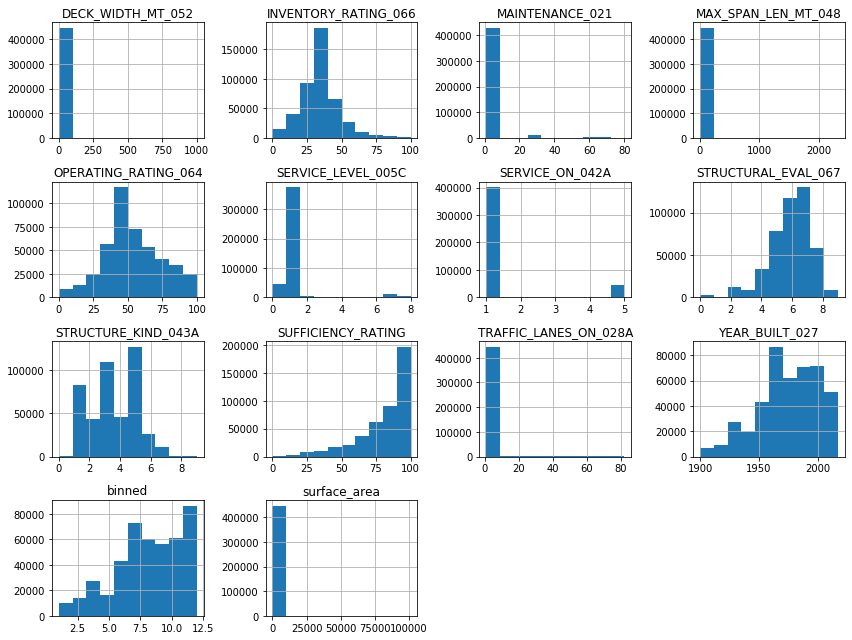

In [89]:
plt.rcParams["figure.figsize"] = [12,9]
bridges99.hist()
plt.tight_layout()

In [90]:
bridges99.shape

(446852, 23)

**SOME CRAZY NUMBERS IN LANE COUNT LIKE 80 LANES --  TYPOS?**

**WILL KEEP TOP 4 SUBCATEGORIES -- 1,2,3,4 lanes -- THEY MAKE UP OVER 95% OF VALUES**

In [91]:
bridges99['TRAFFIC_LANES_ON_028A'].value_counts()

2.0     351711
1.0      34567
4.0      25124
3.0      17939
5.0       6310
6.0       5988
8.0       1739
7.0       1474
10.0       711
9.0        537
12.0       267
11.0       231
13.0        92
14.0        79
20.0        31
15.0        15
16.0        10
40.0         5
50.0         5
17.0         4
45.0         2
18.0         2
19.0         1
70.0         1
80.0         1
82.0         1
21.0         1
30.0         1
25.0         1
22.0         1
60.0         1
Name: TRAFFIC_LANES_ON_028A, dtype: int64

In [0]:
bridges99=bridges99[(bridges99['TRAFFIC_LANES_ON_028A']==1) | (bridges99['TRAFFIC_LANES_ON_028A']==2) |(bridges99['TRAFFIC_LANES_ON_028A']==3)| (bridges99['TRAFFIC_LANES_ON_028A']==4)]

In [93]:
bridges99['TRAFFIC_LANES_ON_028A'].value_counts()

2.0    351711
1.0     34567
4.0     25124
3.0     17939
Name: TRAFFIC_LANES_ON_028A, dtype: int64

In [94]:
bridges99.shape

(429341, 23)

df.groupby('city').filter(lambda x : len(x)>3)

Solution two transform

sub_df = df[df.groupby('city').city.transform('count')>3].copy()

**CREATING SUBSET OF NUMERICAL FEATURES**

In [0]:
n=[col for col in list(bridges99) if bridges99[col].dtype!=object]

**BIVARIATE ANALYSIS**

temporarily add the target back in to numerical features

In [96]:
bridges99[n].corr()

,SERVICE_LEVEL_005C,MAINTENANCE_021,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,SERVICE_ON_042A,STRUCTURE_KIND_043A,MAX_SPAN_LEN_MT_048,DECK_WIDTH_MT_052,OPERATING_RATING_064,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,SUFFICIENCY_RATING,binned,surface_area
SERVICE_LEVEL_005C,1.000000,0.006546,0.052890,-0.087648,-0.041729,0.035785,0.122978,0.012604,0.031727,0.036146,0.046463,0.053723,0.052502,0.073114
MAINTENANCE_021,0.006546,1.000000,-0.000550,-0.069682,0.020657,0.044874,0.019539,-0.030399,-0.040473,-0.005476,-0.010858,-0.034308,-0.000628,0.003381
YEAR_BUILT_027,0.052890,-0.000550,1.000000,0.075985,-0.056143,0.273960,0.157093,0.114363,0.319409,0.340569,0.584475,0.550049,0.993439,0.159117
TRAFFIC_LANES_ON_028A,-0.087648,-0.069682,0.075985,1.000000,0.220627,0.024609,0.171362,0.570707,0.157535,0.144723,0.145611,0.137738,0.071817,0.408159
SERVICE_ON_042A,-0.041729,0.020657,-0.056143,0.220627,1.000000,-0.004493,0.092881,0.263328,0.086979,0.068779,0.000156,-0.038029,-0.057298,0.170260
STRUCTURE_KIND_043A,0.035785,0.044874,0.273960,0.024609,-0.004493,1.000000,0.224150,0.076843,0.103066,0.080780,0.147420,0.147468,0.273597,0.184932
MAX_SPAN_LEN_MT_048,0.122978,0.019539,0.157093,0.171362,0.092881,0.224150,1.000000,0.238055,0.155299,0.113969,0.129480,0.091749,0.155091,0.861133
DECK_WIDTH_MT_052,0.012604,-0.030399,0.114363,0.570707,0.263328,0.076843,0.238055,1.000000,0.212008,0.179872,0.182580,0.220415,0.110035,0.570754
OPERATING_RATING_064,0.031727,-0.040473,0.319409,0.157535,0.086979,0.103066,0.155299,0.212008,1.000000,0.879678,0.536776,0.544590,0.314777,0.182806
INVENTORY_RATING_066,0.036146,-0.005476,0.340569,0.144723,0.068779,0.080780,0.113969,0.179872,0.879678,1.000000,0.563869,0.559694,0.336764,0.145733


**HEATMAP**

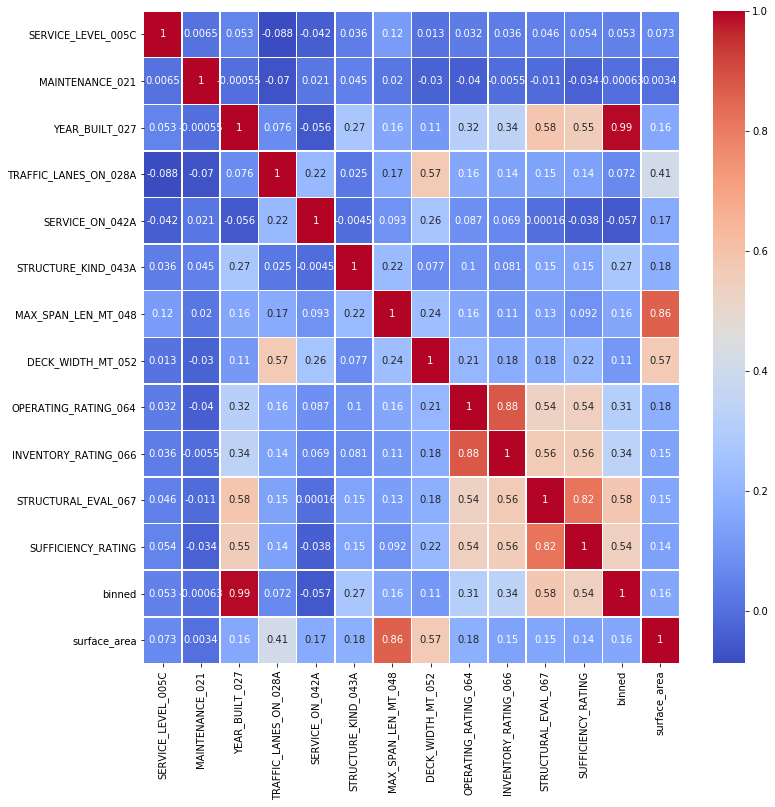

In [98]:
plt.figure(figsize=(12,12))
sns.heatmap(bridges99[n].corr(),annot=True,linewidth=0.5,cmap='coolwarm')

**OVERALL NOT MUCH CORREALTION -- I WILL DROP OPERATOR RATING .88 CORRELATION WITH INVENTORY RATING & YEAR_BUILT .995 CORRELATION WITH BINNED**

In [0]:
bridges99.drop(['OPERATING_RATING_064','YEAR_BUILT_027'],axis=1,inplace=True)

In [100]:
bridges99.shape

(429341, 21)

  **CREATING SUBSET OF OBJECT FEATURES**

In [101]:
k=[col for col in list(bridges99) if bridges99[col].dtype==object]
k

['DESIGN_LOAD_031',
 'DECK_COND_058',
 'SUPERSTRUCTURE_COND_059',
 'SUBSTRUCTURE_COND_060',
 'DECK_GEOMETRY_EVAL_068',
 'DECK_STRUCTURE_TYPE_107',
 'SURFACE_TYPE_108A',
 'MEMBRANE_TYPE_108B',
 'DECK_PROTECTION_108C']

**GET VALUE_COUNT GETS FOR ALL CATEGORICALS**

In [102]:
for col in k:
  print(col)
  print(bridges99[col].value_counts())
  print('')

DESIGN_LOAD_031
5    171103
0     77826
6     45095
2     34994
4     31831
9     26342
A     16987
1     15080
3      7746
C      1419
B       840
8        64
7        14
Name: DESIGN_LOAD_031, dtype: int64

DECK_COND_058
7    168582
6     97477
8     68432
5     48227
N     19696
9     11884
4     11810
3      2213
0       602
2       338
1        80
Name: DECK_COND_058, dtype: int64

SUPERSTRUCTURE_COND_059
7    149850
6     92993
8     91063
5     48257
N     15075
9     14526
4     13537
3      2755
0       608
2       508
1       169
Name: SUPERSTRUCTURE_COND_059, dtype: int64

SUBSTRUCTURE_COND_060
7    157724
6     95323
8     77522
5     50827
N     15201
4     15041
9     12457
3      3580
2       901
0       615
1       150
Name: SUBSTRUCTURE_COND_060, dtype: int64

DECK_GEOMETRY_EVAL_068
6    95775
5    95557
4    74724
7    53427
9    31982
2    30189
3    26643
N    10502
8    10054
0      485
*        3
Name: DECK_GEOMETRY_EVAL_068, dtype: int64

DECK_STRUCTURE_TYPE_107


In [0]:
#list(bridges99)

**CHANGING TARGET TO BINARY**

In [0]:
bridges99['STRUCTURAL_EVAL_067']=np.where(bridges99['STRUCTURAL_EVAL_067']<5,1,0)

In [105]:
bridges99['STRUCTURAL_EVAL_067'].value_counts()

0    374505
1     54836
Name: STRUCTURAL_EVAL_067, dtype: int64

In [0]:
y=bridges99['STRUCTURAL_EVAL_067']

X=bridges99.drop('STRUCTURAL_EVAL_067',axis=1)

**DROP COLUMNS HIGHLY CORRELATED WITH TARGET**

In [0]:
X2=bridges99.drop(['STRUCTURAL_EVAL_067','SUFFICIENCY_RATING','SUBSTRUCTURE_COND_060'],axis=1)

**ONE-HOT ENCODE**

In [0]:
X2_dummy=pd.get_dummies(X2,drop_first=True)

**TRAIN_TEST_SPLIT**

In [0]:

X_train,X_test,y_train,y_test= train_test_split(X2_dummy, y, test_size = 0.2, random_state = 465)

**`GRIDSEARCH**

In [0]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [4,8],
    'max_features': [2, 3,4],
    'min_samples_leaf': [3,5,8],
    'min_samples_split': [8,12],
    'n_estimators': [10, 20,30]
}
rfc = RandomForestRegressor()
grid = GridSearchCV(rfc, param_grid=param_grid, refit = True, verbose = 3) 

In [145]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.255, total=   0.7s
[CV] bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.228, total=   0.6s
[CV] bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV]  bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.316, total=   0.7s
[CV] bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.163, total=   0.7s
[CV] bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10, score=0.242, total=   0.7s
[CV] bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=20, score=0.283, total=   1.1s
[CV] bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=20 
[CV]  bootstrap=True, ma

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 15.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [146]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'bootstrap': True, 'max_depth': 8, 'max_features': 4, 'min_samples_leaf': 8, 'min_samples_split': 12, 'n_estimators': 30}
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=12, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


#**RANDOMFOREST**

In [200]:
rfc=RandomForestRegressor(max_depth=16,max_features=4,min_samples_leaf=8,min_samples_split=12,n_estimators=30)
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=16, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=12, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

**RESULTS**

In [0]:
rf_predictions = rfc.predict(X_test)

In [202]:
rfc.score(X_train,y_train)

0.6781277303457478

In [203]:
rfc.score(X_test,y_test)

0.6740839178062921

In [151]:
# answer below:
important_features_dict = {}
for x,i in enumerate(rfc.feature_importances_):
    important_features_dict[x]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print ('Most important features: %s' %important_features_list)

Most important features: [7, 35, 8, 6, 25, 34, 2, 58, 26, 9, 4, 67, 39, 38, 44, 36, 24, 14, 77, 1, 10, 11, 68, 5, 28, 61, 50, 85, 29, 37, 33, 66, 52, 40, 18, 74, 15, 51, 27, 19, 83, 70, 13, 47, 32, 3, 45, 56, 30, 76, 42, 23, 0, 21, 59, 43, 55, 63, 41, 62, 53, 31, 75, 22, 12, 49, 46, 72, 60, 82, 65, 71, 69, 20, 48, 73, 54, 64, 81, 84, 78, 80, 16, 17, 57, 79]


//////////////////////////////////////////////////////////////////////////////////////////////////////////


In [0]:
importances = rfc.feature_importances_

In [0]:
indices = np.argsort(importances)

In [0]:
features = X2_dummy.columns

**PLOT OF FEATURE IMPORTANCE**

Text(0.5, 0, 'Relative Importance')

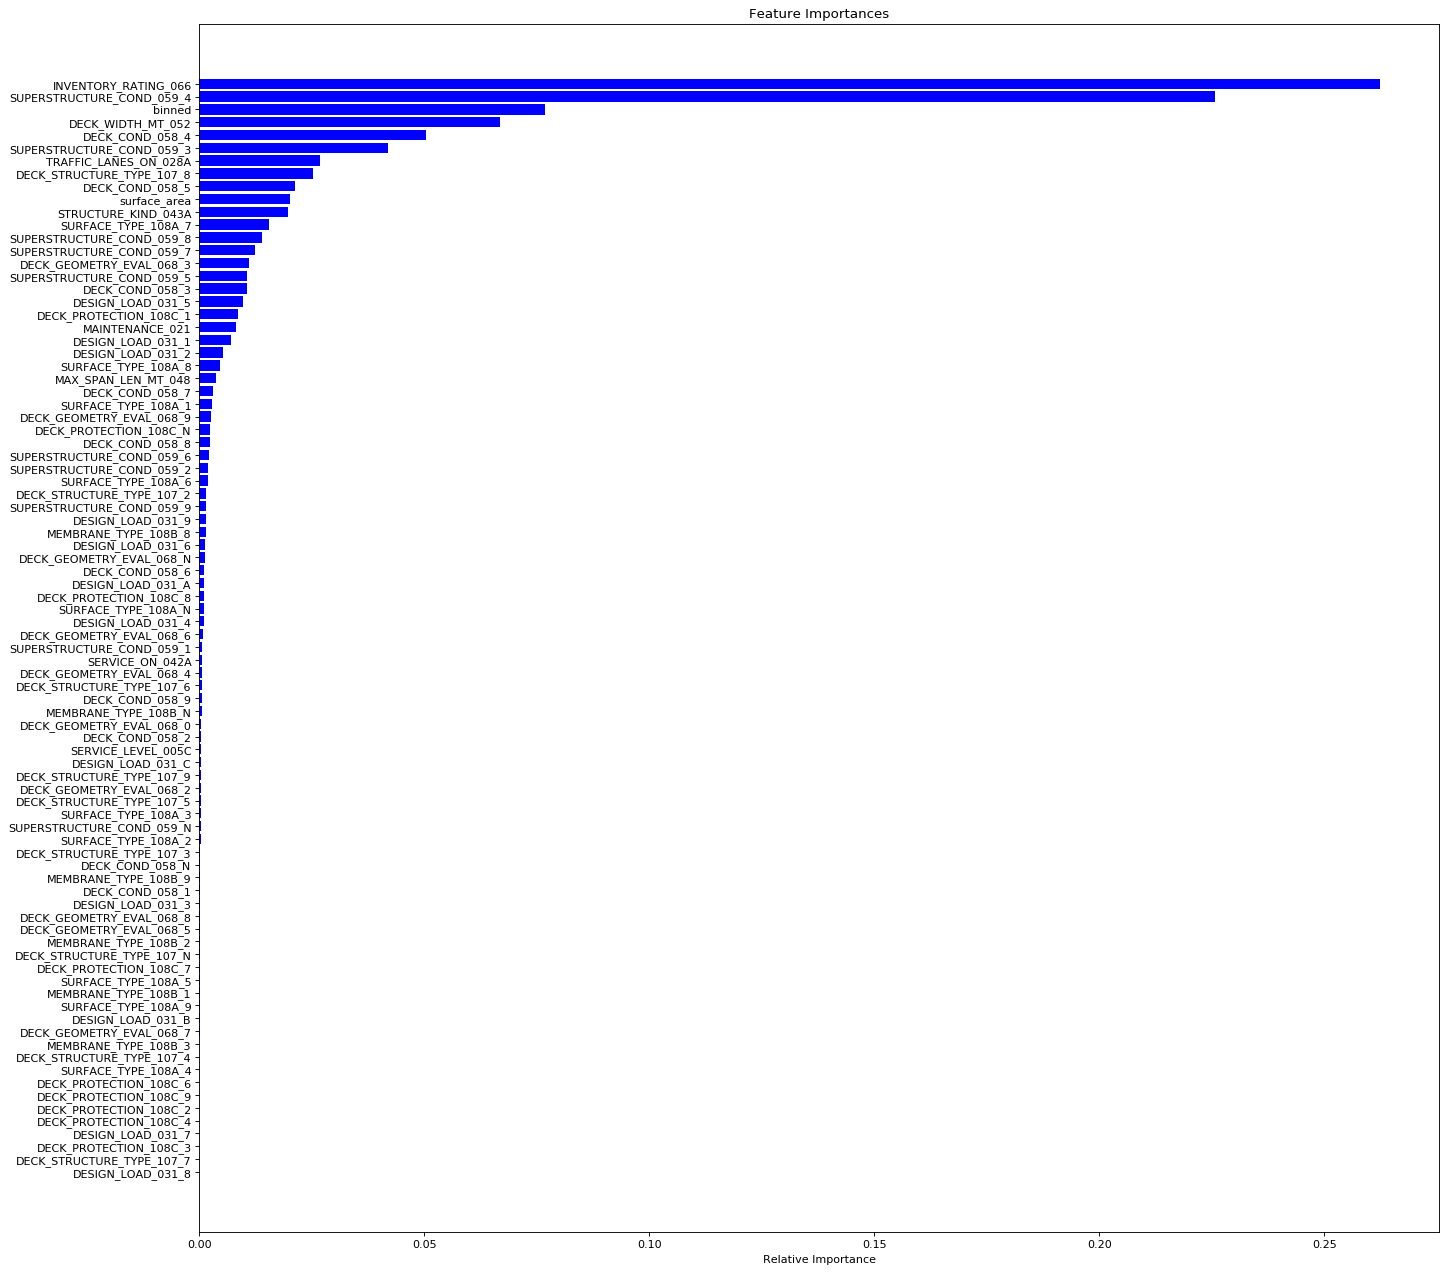

In [156]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20,20), dpi=80, facecolor='w', edgecolor='k')
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

//////////////////////////////////////////////////////////////////////////////////////////////////////

////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

#**LOGISTIC REGRESSION**

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
logistic = linear_model.LogisticRegression(solver='liblinear')

In [160]:
logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
logistic_predictions = logistic.predict(X_test)

**CONFUSION MATRIX**

In [173]:
cm = pd.DataFrame(confusion_matrix(y_test, logistic_predictions))
cm

,0,1
0,74349,654
1,2542,8324


In [162]:
logistic.score(X_train,y_train)

0.962637420226394

In [164]:
logistic.score(X_test,y_test)

0.9627805145046524

In [0]:
train_probs = logistic.predict_proba(X_train)
test_probs = logistic.predict_proba(X_test)

In [0]:
from sklearn.metrics import confusion_matrix, log_loss

**`LOG-LOSS`**

In [194]:
log_loss(y_train, train_probs)

0.1313612351196324

In [170]:
log_loss(y_test, test_probs)

0.1281437105177606

**CONCLUSION -- LOGISITIC REGRESSION IS BEST MODEL FOR THIS CLASSIFICATION PROBLEM**